# Task 3 - Classification (Credit Card Fraud Detection Dataset)

## Substantive Issue

*Topic: Detecting fraudulent transactions using machine learning models.*

Financial fraud is a constant challenge, with credit card fraud being one of the more prevalent forms of scam. Identifying fraudulent transactions accurately is crucial for financial institutions to minimise losses and protect its consumers. The "Credit Card Fraud Detection" dataset allows us to detect fraudulent transactions using machine learning classification models.

## Research Questions

The research questions (RQs) identified for this study are as follows:

**RQ1:** Can machine learning models accurately classify transactions as fraudulent and non-fraudulent?

**RQ2:** Which features contribute the most to detecting fraud, and how can this knowledge enhance fraud prevention strategies?

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, classification_report, roc_curve, auc
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE

## Load Dataset

In [2]:
# Load the Credit Card Fraud Detecetion Dataset
data = pd.read_csv('/Users/joline/Desktop/ml coursework datasets/Credit Card Fraud Detection.csv')

The dataset contains transactions made by credit cards in September 2013 by European cardholders.

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

In [3]:
# Show the first 5 rows of the dataset
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**The dataset contains:**

Features V1, V2, … V28 which are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. 

- 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 
- 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. 
- 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

## Data Cleaning

In [4]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Print missing_values
missing_values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
# Check for duplicates in the dataset
duplicated_rows_mask = data.duplicated(keep=False)

# Print duplicated rows
if duplicated_rows_mask.any():
    print("\nDuplicated Rows:")
    print(data[duplicated_rows_mask])  
else:
    print("No duplicated rows found.")


Duplicated Rows:
            Time        V1        V2        V3        V4        V5        V6  \
32          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
33          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
34          26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
35          26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
112         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
...          ...       ...       ...       ...       ...       ...       ...   
283485  171627.0 -1.457978  1.378203  0.811515 -0.603760 -0.711883 -0.471672   
284190  172233.0 -2.667936  3.160505 -3.355984  1.007845 -0.377397 -0.109730   
284191  172233.0 -2.667936  3.160505 -3.355984  1.007845 -0.377397 -0.109730   
284192  172233.0 -2.691642  3.123168 -3.339407  1.017018 -0.293095 -0.167054   
284193  172233.0 -2.691642  3.123168 -3.339407  1.017018 -0.293095 -0.167054   

              V7     

In [6]:
# Check which columns has duplicates
print(data[duplicated_rows_mask].groupby(data.columns.tolist()).size())

Time      V1         V2         V3         V4         V5         V6         V7         V8         V9         V10        V11        V12       V13        V14        V15        V16        V17        V18        V19        V20        V21        V22        V23        V24        V25        V26        V27        V28        Amount  Class
26.0      -0.535388   0.865268   1.351076   0.147575   0.433680   0.086983   0.693039   0.179742  -0.285642  -0.482474   0.871800  0.853447  -0.571822   0.102252  -1.519991  -0.285912  -0.309633  -0.403902  -0.823743  -0.283264   0.049526   0.206537  -0.187108   0.000753   0.098117  -0.553471  -0.078306   0.025427  1.77    0        2
          -0.529912   0.873892   1.347247   0.145457   0.414209   0.100223   0.711206   0.176066  -0.286717  -0.484688   0.872490  0.851636  -0.571745   0.100974  -1.519772  -0.284376  -0.310524  -0.404248  -0.823374  -0.290348   0.046949   0.208105  -0.185548   0.001031   0.098816  -0.552904  -0.073288   0.023307  6.14    0       

In [7]:
# Remove exact duplicates
data = data.drop_duplicates(keep='first')
print("Duplicates removed. New dataset shape:", data.shape)

Duplicates removed. New dataset shape: (283726, 31)


## Basic Data Statistics

In [8]:
# Display basic info about the dataset
data_info = {
    "Rows": data.shape[0],
    "Columns": data.shape[1],
    "Class Distribution": data['Class'].value_counts(normalize=True)
}

data_info

{'Rows': 283726,
 'Columns': 31,
 'Class Distribution': 0    0.998333
 1    0.001667
 Name: Class, dtype: float64}

In [9]:
# Generate summary statistics of dataset
dataset_summary = data.describe()

# Show summary statistics of dataset
dataset_summary

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


## Data Preprocessing

In [10]:
# Separating features (x) and target variable (y)
x = data.drop(columns=['Class'])
y = data['Class']

In [11]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
# Apply SMOTE only for some models (training data)
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train) 

In [13]:
# Standardizing numeric features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_train_smote_scaled = scaler.fit_transform(x_train_smote) 
x_test_smote_scaled = scaler.transform(x_test)

In [14]:
# Summary of preprocessing steps
preprocessing_summary = {
    "Training Samples": x_train.shape[0],
    "Test Samples": x_test.shape[0],
    "Scaling Method": "StandardScaler",
    "Features": list(x.columns)
}

preprocessing_summary

{'Training Samples': 226980,
 'Test Samples': 56746,
 'Scaling Method': 'StandardScaler',
 'Features': ['Time',
  'V1',
  'V2',
  'V3',
  'V4',
  'V5',
  'V6',
  'V7',
  'V8',
  'V9',
  'V10',
  'V11',
  'V12',
  'V13',
  'V14',
  'V15',
  'V16',
  'V17',
  'V18',
  'V19',
  'V20',
  'V21',
  'V22',
  'V23',
  'V24',
  'V25',
  'V26',
  'V27',
  'V28',
  'Amount']}

## Exploratory Data Analysis

### Boxplots for Identifying Outliers

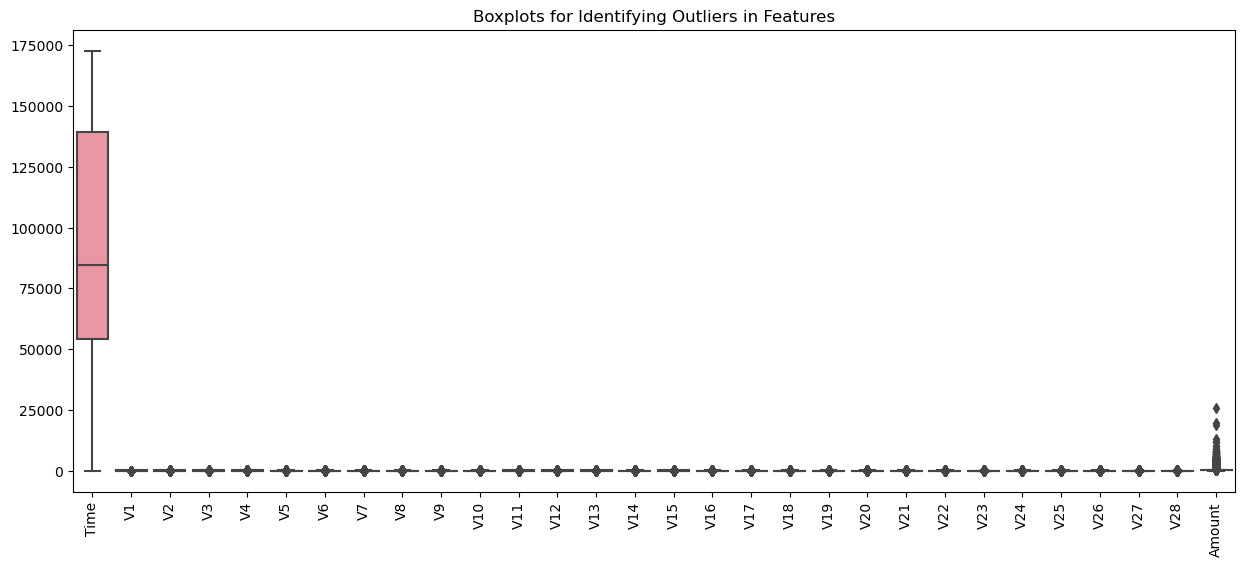

In [15]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=data.drop(columns=["Class"]))
plt.xticks(rotation=90)
plt.title("Boxplots for Identifying Outliers in Features")
plt.show()

This boxplot visualizes the distribution of feature values and highlights outliers. 

- The "Time" feature has a very large scale compared to other features. 

- The "Amount" feature has significant outliers. There are multiple extreme values, suggesting some transactions have very high amounts.

### Distributions of Numerical Variables

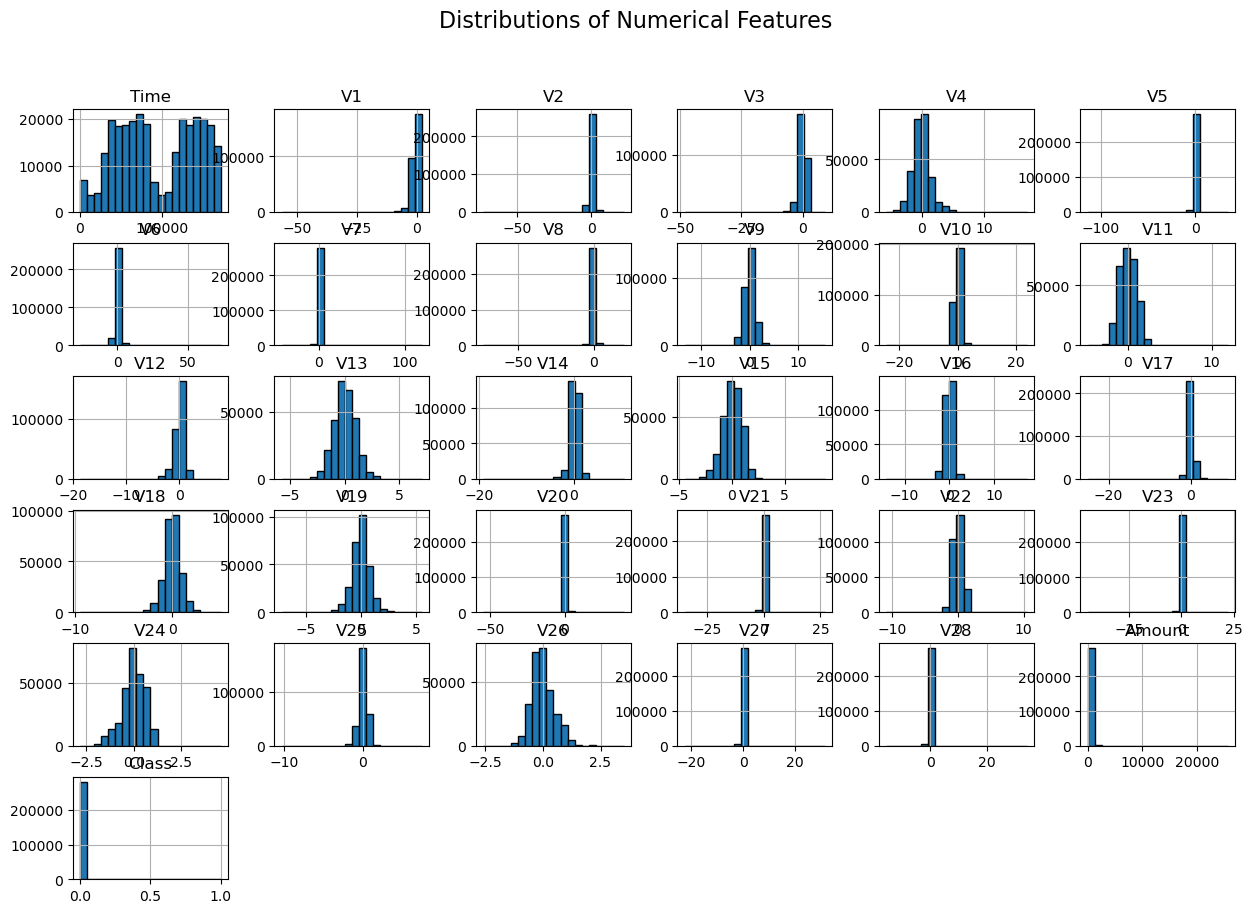

In [16]:
data.hist(figsize=(15, 10), bins=20, edgecolor="black")
plt.suptitle("Distributions of Numerical Features", fontsize=16)
plt.show()

The "Time" feature is bimodal as seen from its two peaks. This suggests transactions follow a cyclical pattern 

Most PCA-transformed features (V1 to V28) follow a normal distribution. This is expected since PCA aims to create normally distributed components.

The "Amount" feature is highly skewed. Most transaction amounts are very low, but a few have extremely high values.

The "Class" feature is highly imbalanced (mostly 0s), suggesting that fraud cases (Class=1) are rare.

### Correlation Analysis

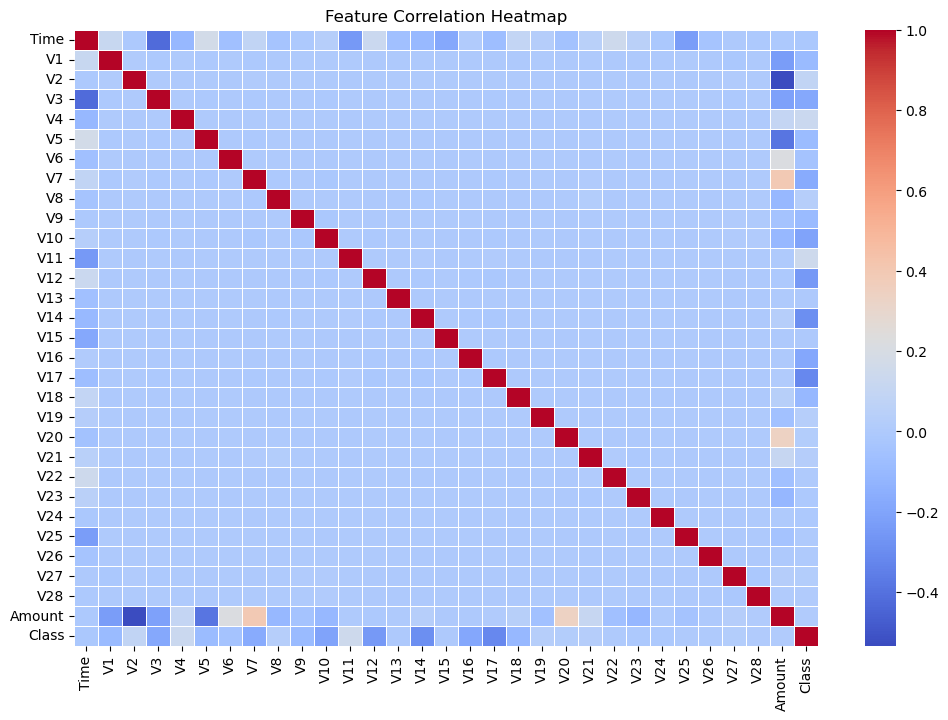

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

The features V1 to V28 come from Principal Component Analysis (PCA). PCA aims to make features uncorrelated, which is why most values are close to zero (light blue).

The "Amount" feature has mild positive and negative correlations with certain PCA components (e.g. V7 and V20). This suggests that transaction amounts may influence fraud detection.

The "Class" feature (fraud/not fraud) has almost no strong correlations with any feature. Because fraudulent transactions are rare and unpredictable. Fraud detection is not a simple linear problem where fraud can be determined just by looking at individual features.

### Fraud VS No Fraud

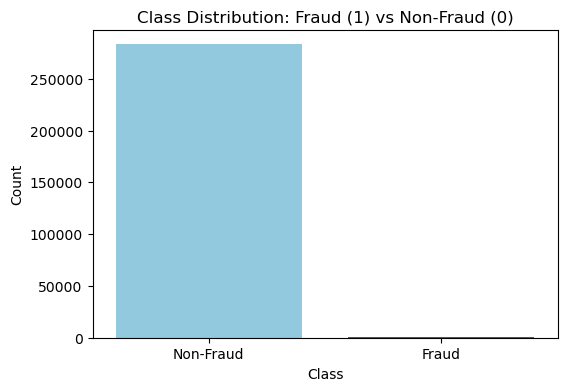

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(x=data["Class"], palette=["skyblue", "red"])
plt.title("Class Distribution: Fraud (1) vs Non-Fraud (0)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Non-Fraud", "Fraud"])
plt.show()

## Model Training

### Logistic Regression

In [19]:
# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [20]:
# Predictions and evaluation for Logistic Regression
y_pred_proba = logistic_model.predict_proba(x_test_scaled)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_proba)
auc_score = auc(fpr_log, tpr_log)

In [21]:
# Classification report
y_pred = logistic_model.predict(x_test_scaled)
report = classification_report(y_test, y_pred, output_dict=True)

In [22]:
# Store results for Logistic Regression
logistic_results = {
    "Model": "Logistic Regression",
    "Accuracy": report['accuracy'],
    "Precision": report['1']['precision'],
    "Recall": report['1']['recall'],
    "F1-Score": report['1']['f1-score'],
    "AUC": auc_score
}

logistic_results

{'Model': 'Logistic Regression',
 'Accuracy': 0.9991188806259472,
 'Precision': 0.8461538461538461,
 'Recall': 0.5789473684210527,
 'F1-Score': 0.6875,
 'AUC': 0.9561936473458451}

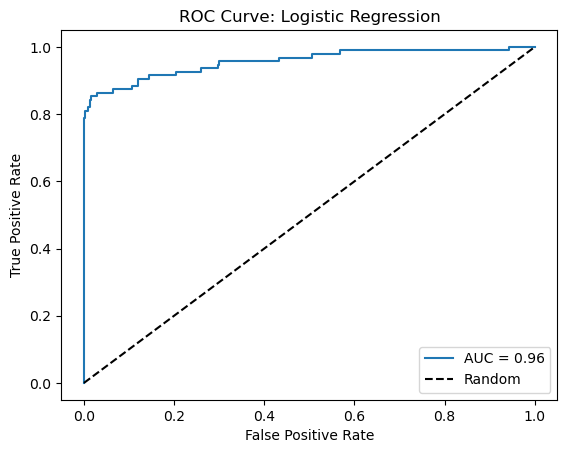

In [23]:
# Plot ROC curve for Logistic Regression
plt.figure()
plt.plot(fpr_log, tpr_log, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Logistic Regression")
plt.legend()
plt.show()

The Area Under the Curve (AUC) = 0.96 means Logistic Regression performs very well. The blue curve is far from the diagonal black "random guess" line. This confirms that Logistic Regression model has a strong ability to separate fraud from non-fraud. The curve is steep at the start (high True Positive Rate with low False Positives). This suggests that the Logistic Regression model prioritizes catching fraud cases early with minimal errors.

### Decision Tree

In [24]:
# Initialize and train the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(x_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [25]:
# Predictions and evaluation for Decision Tree
y_pred_proba = decision_tree_model.predict_proba(x_test_scaled)[:, 1]
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_pred_proba)
auc_score = auc(fpr_tree, tpr_tree)

In [26]:
# Classification report
y_pred = decision_tree_model.predict(x_test_scaled)
report = classification_report(y_test, y_pred, output_dict=True)

In [27]:
# Store results for Decision Tree
decision_tree_results = {
    "Model": "Decision Tree",
    "Accuracy": report['accuracy'],
    "Precision": report['1']['precision'],
    "Recall": report['1']['recall'],
    "F1-Score": report['1']['f1-score'],
    "AUC": auc_score
}

decision_tree_results

{'Model': 'Decision Tree',
 'Accuracy': 0.999048391076023,
 'Precision': 0.7204301075268817,
 'Recall': 0.7052631578947368,
 'F1-Score': 0.7127659574468086,
 'AUC': 0.8524021037395169}

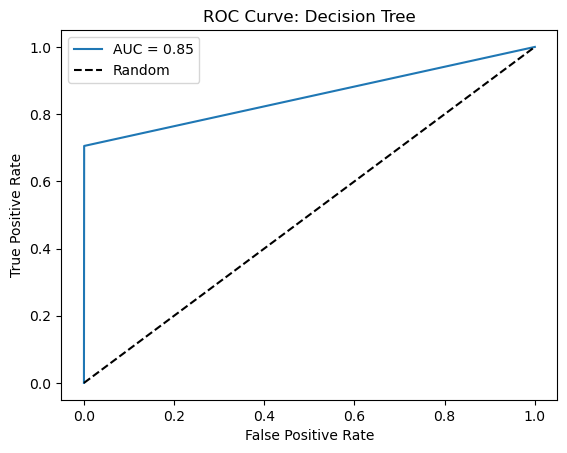

In [28]:
# Plot ROC curve for Decision Tree
plt.figure()
plt.plot(fpr_tree, tpr_tree, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Decision Tree")
plt.legend()
plt.show()

The Area Under the Curve (AUC) = 0.85, indicating that the Decision Tree model has moderate performance in distinguishing fraud from non-fraud cases. The blue curve is above the diagonal black "random guess" line, confirming that the model has some predictive power. However, the curve is less steep compared to Logistic Regression, meaning that the Decision Tree model struggles more with difficult fraud cases. The sharp initial rise followed by a flatter curve suggests that the model performs well at detecting obvious fraud cases but is less reliable for borderline cases.

### XGBoost

In [29]:
# Initialize and train the XGBoost model
xgboost_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgboost_model.fit(x_train_scaled, y_train)

/Users/joline/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [20:08:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [30]:
# Predictions and evaluation for XGBoost
y_pred_proba = xgboost_model.predict_proba(x_test_scaled)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba)
auc_score = auc(fpr_xgb, tpr_xgb)

In [31]:
# Classification report
y_pred = xgboost_model.predict(x_test_scaled)
report = classification_report(y_test, y_pred, output_dict=True)

In [32]:
# Store results for XGBoost
xgboost_results = {
    "Model": "XGBoost",
    "Accuracy": report['accuracy'],
    "Precision": report['1']['precision'],
    "Recall": report['1']['recall'],
    "F1-Score": report['1']['f1-score'],
    "AUC": auc_score
}

xgboost_results

{'Model': 'XGBoost',
 'Accuracy': 0.9995241955380115,
 'Precision': 0.9594594594594594,
 'Recall': 0.7473684210526316,
 'F1-Score': 0.8402366863905325,
 'AUC': 0.9709463947772558}

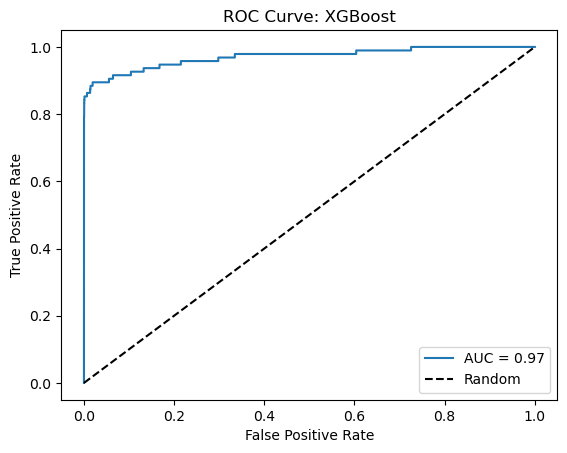

In [33]:
# Plot ROC curve for XGBoost
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: XGBoost")
plt.legend()
plt.show()

The Area Under the Curve (AUC) = 0.97, indicating that the XGBoost model is good in distinguishing fraud from non-fraud cases. The blue curve is far from the diagonal black "random guess" line, confirming that XGBoost has a strong ability to separate fraudulent transactions. The curve is steep at the start, meaning the model achieves a high True Positive Rate while keeping False Positives low. This suggests that XGBoost is highly effective at detecting fraud early with minimal errors.

### Gradient Boosting

In [34]:
# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(x_train_scaled, y_train)

GradientBoostingClassifier(random_state=42)

In [35]:
# Predictions and evaluation for Gradient Boosting
y_pred_proba = gb_model.predict_proba(x_test_scaled)[:,1]
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_proba)
auc_score = auc(fpr_gb, tpr_gb)

In [36]:
# Classification report
y_pred = gb_model.predict(x_test_scaled)
report = classification_report(y_test, y_pred, output_dict=True)

In [37]:
# Store results for Gradient Boosting
gb_results = {
    "Model": "Gradient Boosting",
    "Accuracy": report['accuracy'],
    "Precision": report["1"]["precision"],
    "Recall": report["1"]["recall"],
    "F1-Score": report["1"]["f1-score"],
    "AUC": auc_score
}

gb_results

{'Model': 'Gradient Boosting',
 'Accuracy': 0.9992422373383146,
 'Precision': 0.8823529411764706,
 'Recall': 0.631578947368421,
 'F1-Score': 0.7361963190184049,
 'AUC': 0.8089027090152169}

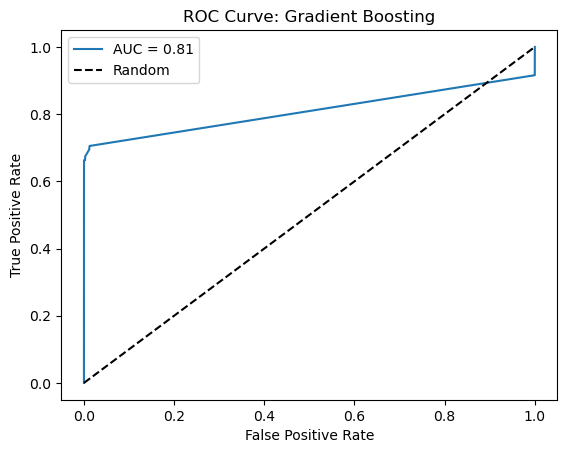

In [38]:
# Plot ROC Curve for Gradient Boosting
plt.figure()
plt.plot(fpr_gb, tpr_gb, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Gradient Boosting")
plt.legend()
plt.show()

The Area Under the Curve (AUC) = 0.81, indicating that the Gradient Boosting model has moderate performance in distinguishing fraud from non-fraud cases. The blue curve is above the diagonal black "random guess" line, confirming that the model has some predictive power but is weaker compared to XGBoost and Logistic Regression models. The curve is less steep and flattens quickly, suggesting that Gradient Boosting is less effective at separating fraudulent transactions from non-fraudulent ones.

### Ridge Classifier

In [39]:
# Initialize and train the Ridge Classifier model
ridge_model = RidgeClassifier()
ridge_model.fit(x_train_smote_scaled, y_train_smote)

RidgeClassifier()

In [40]:
# Predictions and evaluation for Ridge Classifier
y_pred = ridge_model.predict(x_test_smote_scaled)

In [41]:
# Classification report
report = classification_report(y_test, y_pred, output_dict=True)

Ridge Classifier does not output probability scores, so AUC cannot be calculated.

In [42]:
# Store results (Ridge does not output probabilities, so no AUC)
ridge_results = {
    "Model": "Ridge Classifier",
    "Accuracy": report['accuracy'],
    "Precision": report["1"]["precision"],
    "Recall": report["1"]["recall"],
    "F1-Score": report["1"]["f1-score"],
    "AUC": "N/A"  # No AUC for Ridge Classifier
}

ridge_results

{'Model': 'Ridge Classifier',
 'Accuracy': 0.9899904839107603,
 'Precision': 0.1216,
 'Recall': 0.8,
 'F1-Score': 0.2111111111111111,
 'AUC': 'N/A'}

### Lasso Regression
Replaced with Logistic Regression with L1 penalty

In [43]:
# Initialize and train the Lasso Regression model
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=42)
lasso_model.fit(x_train_smote_scaled, y_train_smote)

LogisticRegression(max_iter=1000, penalty='l1', random_state=42,
                   solver='liblinear')

In [44]:
# Predictions and evaluation for Lasso Regression
y_pred_proba = lasso_model.predict_proba(x_test_smote_scaled)[:, 1]
fpr_lasso, tpr_lasso, _ = roc_curve(y_test, y_pred_proba)
auc_score = auc(fpr_lasso, tpr_lasso)

In [45]:
# Classification report
y_pred = lasso_model.predict(x_test_smote_scaled)
report = classification_report(y_test, y_pred, output_dict=True)

In [46]:
# Store results for Lasso Regression
lasso_results = {
    "Model": "Lasso (LogReg L1)",
    "Accuracy": report['accuracy'],
    "Precision": report["1"]["precision"],
    "Recall": report["1"]["recall"],
    "F1-Score": report["1"]["f1-score"],
    "AUC": auc_score
}

lasso_results

{'Model': 'Lasso (LogReg L1)',
 'Accuracy': 0.9913121629718394,
 'Precision': 0.14464285714285716,
 'Recall': 0.8526315789473684,
 'F1-Score': 0.24732824427480918,
 'AUC': 0.9615184941223689}

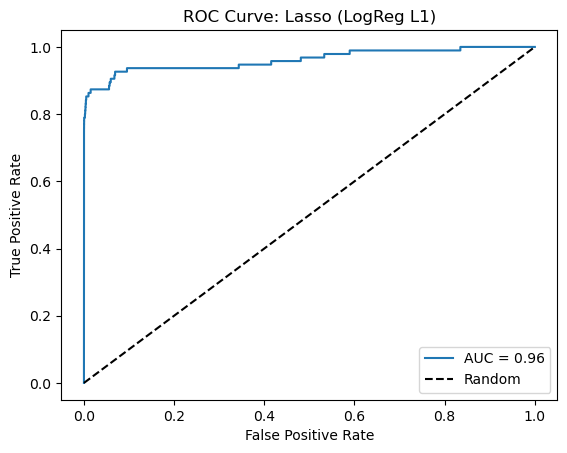

In [47]:
# Plot ROC Curve for Lasso Regression
plt.figure()
plt.plot(fpr_lasso, tpr_lasso, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Lasso (LogReg L1)")
plt.legend()
plt.show()

The Area Under the Curve (AUC) = 0.96, indicating that the Lasso Regression model performs very well in distinguishing fraud from non-fraud cases. The blue curve is far from the diagonal black "random guess" line, confirming that Lasso Regression has a strong ability to separate fraudulent transactions. The curve is steep at the start, meaning the model achieves a high True Positive Rate while keeping False Positives low. This suggests that Lasso Regression is highly effective at detecting fraud early, similar to Logistic Regression while potentially benefiting from feature selection due to L1 regularisation.

## Model Evaluation

In [48]:
# Summary of all  models

# Define the models and their corresponding result variables
model_results_dict = {
    "Logistic Regression": logistic_results,
    "Decision Tree": decision_tree_results,
    "XGBoost": xgboost_results,  # This will be skipped if not available
    "Gradient Boosting": gb_results,
    "Ridge Classifier": ridge_results,
    "Lasso (LogReg L1)": lasso_results
}

# Convert dictionary into DataFrame dynamically
model_results_df = pd.DataFrame([
    {
        "Model": model_name,
        "Accuracy": results["Accuracy"],
        "Precision": results["Precision"],
        "Recall": results["Recall"],
        "F1-Score": results["F1-Score"],
        "AUC": results["AUC"] if results["AUC"] != "N/A" else None  # Handling Ridge Classifier without AUC
    }
    for model_name, results in model_results_dict.items() if results is not None
])

print(model_results_df)

                 Model  Accuracy  Precision    Recall  F1-Score       AUC
0  Logistic Regression  0.999119   0.846154  0.578947  0.687500  0.956194
1        Decision Tree  0.999048   0.720430  0.705263  0.712766  0.852402
2              XGBoost  0.999524   0.959459  0.747368  0.840237  0.970946
3    Gradient Boosting  0.999242   0.882353  0.631579  0.736196  0.808903
4     Ridge Classifier  0.989990   0.121600  0.800000  0.211111       NaN
5    Lasso (LogReg L1)  0.991312   0.144643  0.852632  0.247328  0.961518


- XGBoost achieved the highest AUC (0.97) and the best precision (0.959), making it the most effective model.

- Logistic Regression and Lasso Regression performed similarly, both with AUC ~0.96, meaning they are strong and effective models as well.

- Gradient Boosting underperformed compared to XGBoost.

- Ridge Classifier had poor precision (0.12) and an undefined AUC, suggesting it struggled with fraud detection.

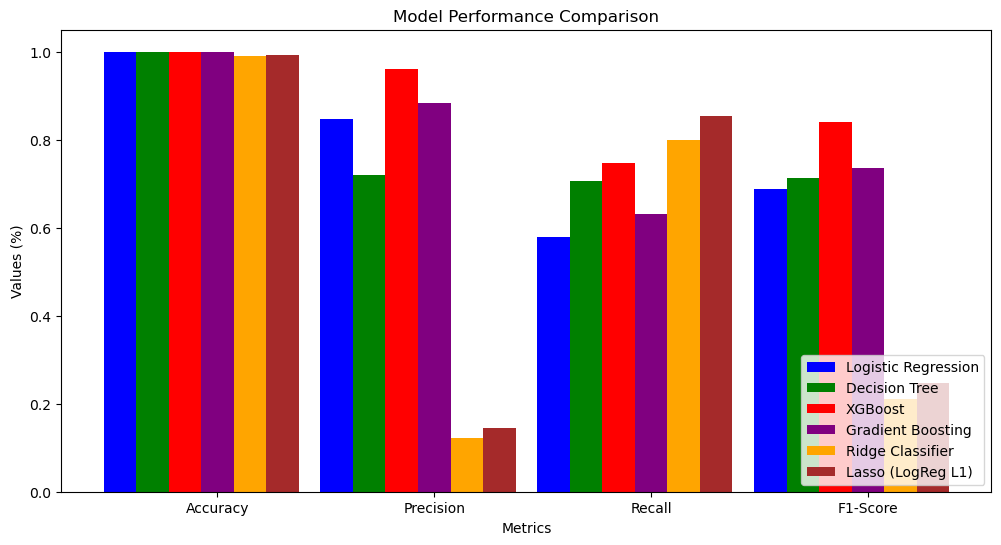

In [49]:
plt.figure(figsize=(12, 6))
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
x = np.arange(len(metrics))

width = 0.15
colors = ["blue", "green", "red", "purple", "orange", "brown"]

# Plot bars for each model
for i, model in enumerate(model_results_df["Model"]):
    plt.bar(x + (i - len(model_results_df) / 2) * width, model_results_df.iloc[i, 1:5], width, label=model, color=colors[i % len(colors)])

plt.xlabel("Metrics")
plt.ylabel("Values (%)")
plt.title("Model Performance Comparison")
plt.xticks(x, metrics)
plt.legend(loc="lower right")
plt.show()

- All models have nearly perfect accuracy, but this is misleading due to the class imbalance.

- XGBoost outperformed all models in "Precision" and "Recall", making it the best fraud detection model.

- Lasso Logistic Regression had a strong "Recall" (0.85) but a low "Precision" (0.14), indicating it catches fraud cases well but has many false positives.

- Ridge Classifier had the worst "Precision" and "F1-score", confirming its weak predictive ability.

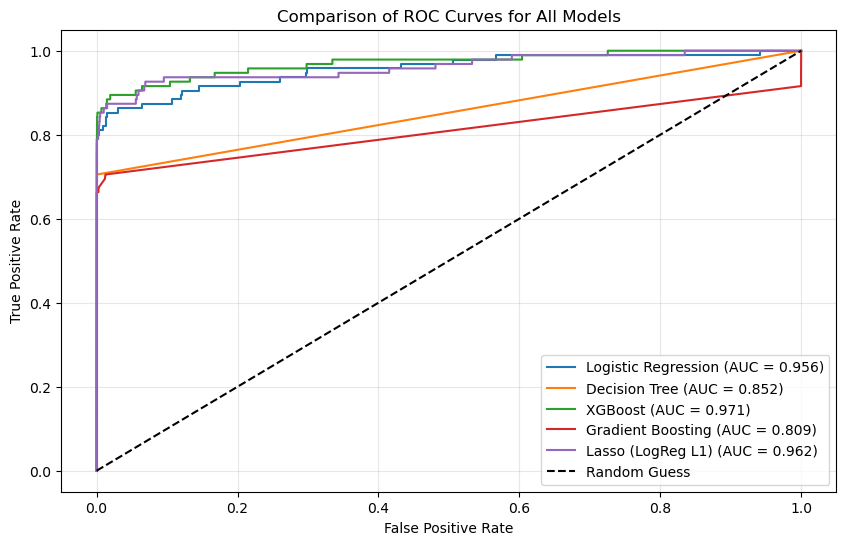

In [50]:
# Extract stored ROC curve data for all models
roc_curves = {
    "Logistic Regression": (fpr_log, tpr_log, logistic_results["AUC"]),
    "Decision Tree": (fpr_tree, tpr_tree, decision_tree_results["AUC"]),
    "XGBoost": (fpr_xgb, tpr_xgb, xgboost_results["AUC"]),
    "Gradient Boosting": (fpr_gb, tpr_gb, gb_results["AUC"]),
    "Ridge Classifier": None,  # Ridge does not output probability scores
    "Lasso (LogReg L1)": (fpr_lasso, tpr_lasso, lasso_results["AUC"])
}

# Plot ROC curves
plt.figure(figsize=(10, 6))

for model_name, data in roc_curves.items():
    if data is not None:
        fpr, tpr, auc_score = data
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_score:.3f})")

# Add plot details
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Comparison of ROC Curves for All Models")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

- XGBoost has the best AUC (0.97), meaning it consistently ranks fraud cases correctly.

- Logistic Regression and Lasso Regression follow closely with AUC ~0.96.

- Decision Tree and Gradient Boosting have lower AUC scores (~0.85 and 0.81, respectively), showing they are less effective for fraud detection.

- Ridge Classifier is missing from the ROC plot as it does not output probability scores.

XGBoost is the strongest model, balancing high precision and recall.

## Feature Importance

Since XGBoost is the best-performing model, we can analyze feature importance to understand which factors contribute the most to fraud detection.

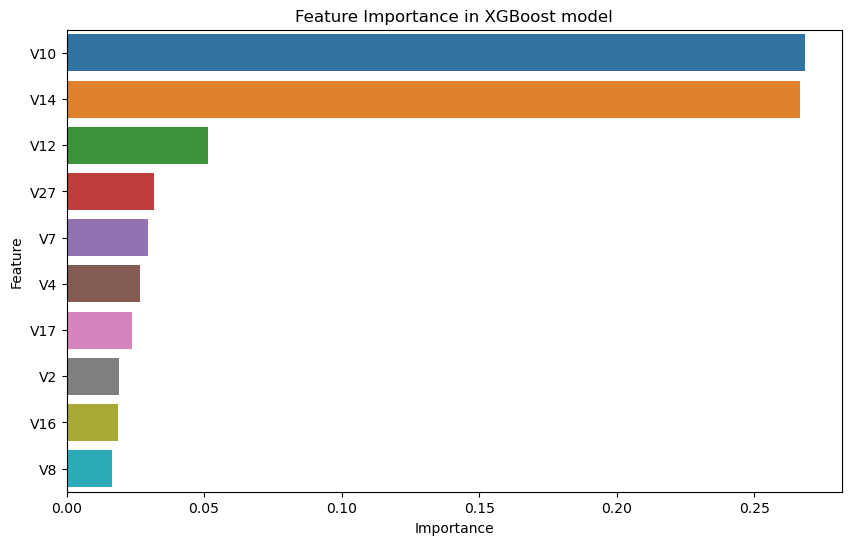

In [51]:
importances = xgboost_model.feature_importances_
feature_names = x_train.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df[:10])
plt.title("Feature Importance in XGBoost model")
plt.show()

V10 and V14 are the most influential features. These two components are responsible for over 50% of the total importance. This suggests that fraud cases tend to have distinct patterns in these dimensions.